<a href="https://colab.research.google.com/github/HKLeeeee/Studying_Algorithm/blob/main/%5Bpycaret%5Danalytics_model_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

In [ ]:
!pip install pycaret

<font color='red'>런타임 재실행</font>

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install markupsafe==2.0.1
!pip install shap==0.39.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from glob import glob
import numpy as np
from sklearn.metrics import classification_report
import os
from time import time
from pycaret.classification import *
from pycaret.utils import check_metric
import shap

# Load Data

In [ ]:
files = glob("/content/drive/MyDrive/Colab Notebooks/maindata set/*.csv")

data_list = {}
for file in files:
    file_name = file.split('/')[-1].split('_')[0]
    print(file_name)
    data = pd.read_csv(file, encoding="cp949")
    data['efficiency'] = data['efficiency'].astype(int)
    data_list[file_name] = data
    
print("총 {}개의 파일을 불러왔습니다.\n".format(len(files)))

overpass
tunnel
총 2개의 파일을 불러왔습니다.



# Define func

In [ ]:
def pycaret_setup(data_set, target_idx: str, random_seed) :
    print(random_seed)
    clf = setup(data=data_set, target=str(target_idx), train_size=0.8, 
                fix_imbalance=True, use_gpu=True, feature_selection=True, 
                remove_multicollinearity=True, multicollinearity_threshold=0.5,
                session_id=random_seed, normalize=True)

In [ ]:
def pycaret_setup2(data_set, target_idx: str, random_seed, is_tunnel=False) :
    print(random_seed)
    numeric=['width', 'length', 'dist_walkway', 'dist_farm', 'frequency_appearance_animals',
          'dist_river', 'dist_hikingtrails', 'fence_length', 'fence_height', 'traffic_volumne', 'dist_buildings',
          'speed_limit', 'num_lane']
    ordinal_col = {'soilslope' : ['7', '6', '5', '4', '3', '2', '1'],
               'environmental_score' : ['5', '4', '3', '2', '1'],
               'frequency_use_hikers' : ['5', '4', '3', '2', '1', '0']}
    if is_tunnel :
      numeric += ['hiehgt', 'openness']
    clf = setup(data=data_set, target=str(target_idx), train_size=0.8, 
                fix_imbalance=True, use_gpu=True, feature_selection=True, 
                remove_multicollinearity=True, multicollinearity_threshold=0.5,
                numeric_features=numeric,
                categorical_features=['topography', 'vegetation'],
                session_id=random_seed, normalize=True)

In [ ]:
def preprocess_df(df, onehot_col=None) :
    if onehot_col is not None:
        df = pd.get_dummies(df, columns=onehot_col)
    return df

In [ ]:
# target_name : test 데이터의 목표변수 컬럼명
def predictModel(train_model, test_set, target_name): 
   pred = predict_model(train_model, data = test_set, verbose=False)
   print("개선율: "+str(check_metric(pred['Label'], test_set[target_name], metric = 'Accuracy')))

In [ ]:
scaling_col_overpass = ['width', 'length', 'dist_walkway', 'dist_farm', 'speed_limit', 'frequency_appearance_animals',
                        'dist_river', 'dist_hikingtrails', 'fence_length', 'fence_height', 'traffic_volumne', 'dist_buildings',
                        'num_lane']
scaling_col_tunnel = scaling_col_overpass + ['hiehgt', 'openness']

In [ ]:
onehot_col = ['frequency_use_hikers', 'soilslope', 'topography', 'environmental_score', 'vegetation']

In [ ]:
df_overpass = preprocess_df(data_list['overpass'], onehot_col)
df_tunnel = preprocess_df(data_list['tunnel'], onehot_col)

# Overpass

In [ ]:
data_set = data_list['overpass']

data_set = data_set.drop('num_near_species', axis=1)

# setup pycaret session
pycaret_setup2(data_set, 'efficiency', is_tunnel=False, random_seed = 5)

Description             Value
0                               session_id                 5
1                                   Target        efficiency
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (300, 19)
5                           Missing Values             False
6                         Numeric Features                13
7                     Categorical Features                 5
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (240, 33)
12                    Transformed Test Set          (60, 33)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU              True
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              99c3
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity              True
43             Multicollinearity Threshold               0.5
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection              True
53                Feature Selection Method           classic
54            Features Selection Threshold               0.8
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance              True
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['topography',
                                                            'vegetation'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['width', 'length',
                                                          'dist_walkway',
                                                          'dist_farm',
                                                          'frequency_appearance_animals',
                                                          'dist_river',
                                                          'dist_hikingtrails',
                            

## Find Best Model

In [ ]:
compare_models(round = 3, sort = 'F1', errors="raise")

Model  Accuracy    AUC  Recall  Prec.  \
lr                    Logistic Regression     0.671  0.715   0.681  0.707   
lda          Linear Discriminant Analysis     0.671  0.703   0.658  0.723   
ridge                    Ridge Classifier     0.667  0.000   0.658  0.714   
svm                   SVM - Linear Kernel     0.642  0.000   0.720  0.657   
rf               Random Forest Classifier     0.612  0.607   0.697  0.634   
gbc          Gradient Boosting Classifier     0.579  0.625   0.666  0.607   
et                 Extra Trees Classifier     0.579  0.606   0.659  0.617   
dt               Decision Tree Classifier     0.579  0.576   0.605  0.621   
lightgbm  Light Gradient Boosting Machine     0.567  0.607   0.613  0.605   
ada                  Ada Boost Classifier     0.525  0.573   0.560  0.565   
knn                K Neighbors Classifier     0.554  0.580   0.513  0.604   
qda       Quadratic Discriminant Analysis     0.517  0.536   0.382  0.484   
nb                            Naive Bayes     0.488  0.580   0.305  0.525   
dummy                    Dummy Classifier     0.450  0.500   0.000  0.000   

             F1  Kappa    MCC  TT (Sec)  
lr        0.690  0.339  0.343     0.031  
lda       0.682  0.343  0.352     0.023  
ridge     0.679  0.334  0.341     0.038  
svm       0.678  0.272  0.292     0.020  
rf        0.663  0.207  0.209     0.889  
gbc       0.633  0.143  0.145     0.132  
et        0.625  0.140  0.144     0.885  
dt        0.609  0.153  0.154     0.022  
lightgbm  0.605  0.125  0.126     0.049  
ada       0.558  0.044  0.043     0.113  
knn       0.547  0.114  0.115     0.041  
qda       0.389  0.052  0.031     0.020  
nb        0.351  0.002 -0.016     0.022  
dummy     0.000  0.000  0.000     0.017

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=355, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=355, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## model 생성 및 학습

In [ ]:
overpass_rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6250  0.6286  0.7143  0.6667  0.6897  0.2174  0.2182
1       0.5833  0.6929  0.7857  0.6111  0.6875  0.0909  0.0976
2       0.6250  0.6964  0.7143  0.6667  0.6897  0.2174  0.2182
3       0.5417  0.6294  0.4615  0.6000  0.5217  0.0959  0.0989
4       0.5833  0.6678  0.5385  0.6364  0.5833  0.1724  0.1748
5       0.3333  0.3357  0.3846  0.3846  0.3846 -0.3427 -0.3427
6       0.5417  0.5804  0.5385  0.5833  0.5600  0.0833  0.0836
7       0.5833  0.5804  0.5385  0.6364  0.5833  0.1724  0.1748
8       0.7083  0.8252  0.9231  0.6667  0.7742  0.3913  0.4345
9       0.7083  0.7797  0.7692  0.7143  0.7407  0.4085  0.4099
Mean    0.5833  0.6416  0.6368  0.6166  0.6215  0.1507  0.1568
Std     0.1003  0.1267  0.1603  0.0855  0.1113  0.1972  0.2027

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#overpass_rf = tune_model(overpass_rf, optimize='F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.5417  0.5175  0.6154  0.5714  0.5926  0.0704  0.0707
1       0.5000  0.5245  0.6154  0.5333  0.5714 -0.0213 -0.0216
2       0.6667  0.7343  0.5385  0.7778  0.6364  0.3469  0.3671
3       0.5000  0.5385  0.5385  0.5385  0.5385 -0.0070 -0.0070
4       0.6667  0.6294  0.6154  0.7273  0.6667  0.3379  0.3427
5       0.7083  0.7832  0.6923  0.7500  0.7200  0.4167  0.4181
6       0.5000  0.5315  0.5385  0.5385  0.5385 -0.0070 -0.0070
7       0.7083  0.6084  0.7692  0.7143  0.7407  0.4085  0.4099
8       0.7083  0.7431  0.9167  0.6471  0.7586  0.4167  0.4583
9       0.6667  0.6597  0.7500  0.6429  0.6923  0.3333  0.3381
Mean    0.6167  0.6270  0.6590  0.6441  0.6456  0.2295  0.2369
Std     0.0890  0.0950  0.1171  0.0899  0.0783  0.1840  0.1907

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=90, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## plot result

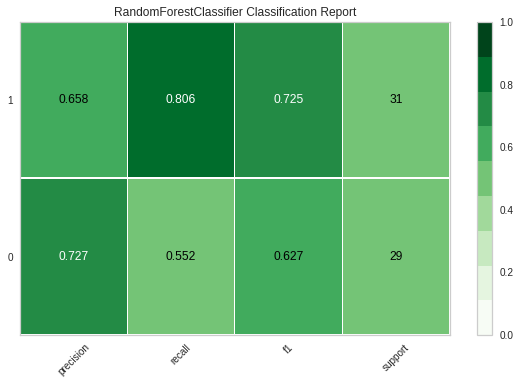

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(overpass_rf, plot='class_report', plot_kwargs={'cmap':'Greens'}, use_train_data=False)

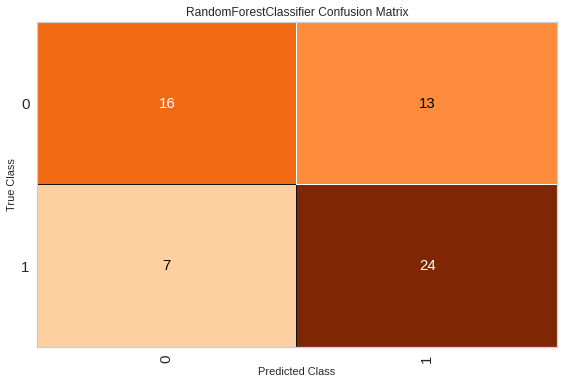

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(overpass_rf, plot='confusion_matrix', plot_kwargs={'cmap':'Oranges'}, use_train_data=False)

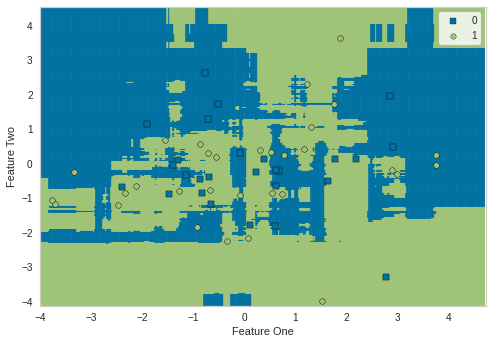

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(overpass_rf, plot='boundary')

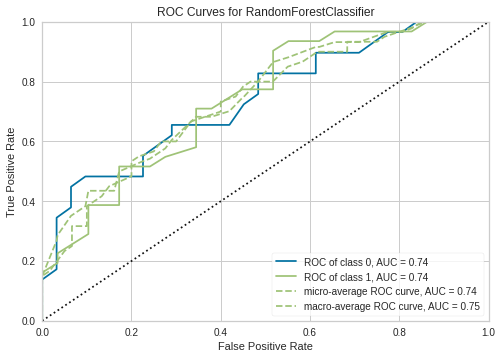

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(overpass_rf, plot='auc')

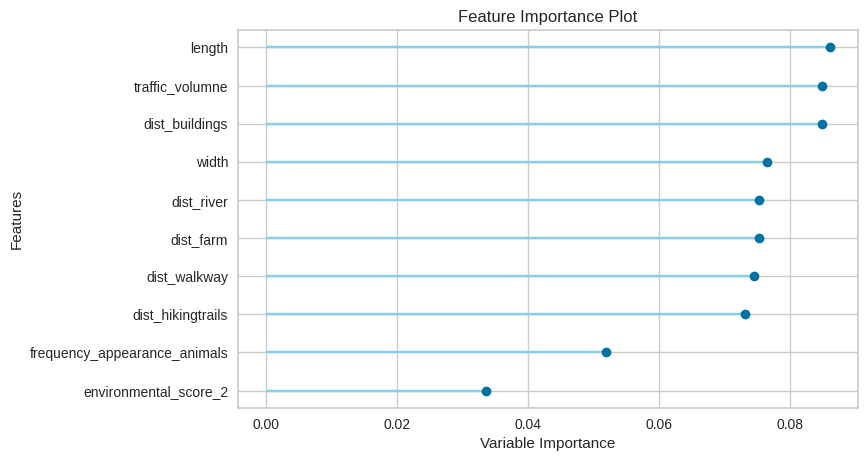

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(overpass_rf, plot='feature')

In [ ]:
fi_df = pd.DataFrame({'Feature': get_config('X_train').columns, 
              'Value' : overpass_rf.feature_importances_}).sort_values(by='Value', ascending=False)
             # 'Value' : overpass_rf.coef_[0, :]}).sort_values(by='Value', ascending=False)
feature_top10 = fi_df['Feature'][:10].to_list()
# feature_top10

In [ ]:
# model save
save_model(overpass_rf, '/content/drive/MyDrive/Colab Notebooks/dao_model/overpass_rf_nottune_ok')

## Inference

In [ ]:
inference_data_set = data_set[data_set['efficiency']==0]
inference_data_set['efficiency'] = 1

predictModel(overpass_rf, inference_data_set, 'efficiency')

In [ ]:
for i,idx in enumerate(feature_top10) :
  mono = data_set[data_set['efficiency']==0]
  mono['efficiency'] = 1
  
  try : 
    amount = data_set.groupby('efficiency')[idx].mean()
  except :
    idx = '_'.join(idx.split('_')[:-1])
    feature_top10[i] = idx
    amount = data_set.groupby('efficiency')[idx].mean()
  diff= amount[0]-amount[1]
  mono[idx] = mono[idx] - diff
  print('***** {} ***** '.format(idx))
  predictModel(overpass_rf, mono, 'efficiency')
  inference_data_set[idx] = inference_data_set[idx] - diff

print('**********Change All********')
predictModel(overpass_rf, inference_data_set, 'efficiency')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


***** length ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0882
***** traffic_volumne ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.1029
***** dist_buildings ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.1029
***** width ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0882
***** dist_river ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0956
***** dist_farm ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0956
***** dist_walkway ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.1029
***** dist_hikingtrails ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0956
***** frequency_appearance_animals ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0956
***** environmental_score ***** 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0882
**********Change All********
개선율: 0.3015


In [ ]:
overpass_insight = data_set.groupby('efficiency')[feature_top10].mean()
overpass_insight = overpass_insight.T
overpass_insight = pd.DataFrame(overpass_insight)
overpass_insight.columns = ['0', '1']
overpass_insight['feature importances values'] = fi_df['Value'][:10].to_list()
overpass_insight.index = feature_top10
overpass_insight.index.name='Feature Name'
overpass_insight = overpass_insight[['feature importances values','0', '1']]
overpass_insight

feature importances values             0  \
Feature Name                                                             
length                                          0.086082     46.580147   
traffic_volumne                                 0.084904  22555.958505   
dist_buildings                                  0.084892      0.162573   
width                                           0.076448     29.091176   
dist_river                                      0.075338   1201.245219   
dist_farm                                       0.075304      0.088515   
dist_walkway                                    0.074472    160.867280   
dist_hikingtrails                               0.073097      1.887939   
frequency_appearance_animals                    0.051897      3.389706   
environmental_score                             0.033657      2.448529   

                                         1  
Feature Name                                
length                           40.106402  
traffic_volumne               27963.490132  
dist_buildings                    0.218450  
width                            34.036565  
dist_river                     1099.197950  
dist_farm                         0.117494  
dist_walkway                    153.862727  
dist_hikingtrails                 1.683861  
frequency_appearance_animals      2.435976  
environmental_score               2.737805

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


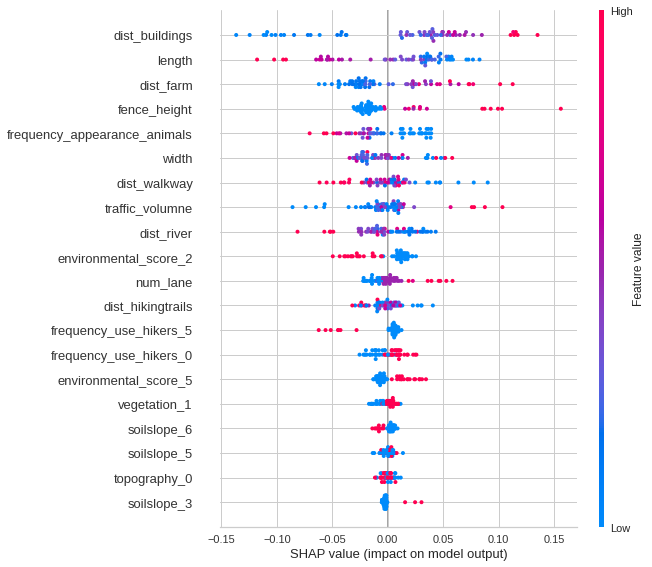

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(overpass_rf)

# Tunnel

In [ ]:
data_set = data_list['tunnel']

data_set = data_set.drop('num_near_species', axis=1)

# setup pycaret session
pycaret_setup2(data_set, 'efficiency', is_tunnel=True, random_seed=337)

Description             Value
0                               session_id               337
1                                   Target        efficiency
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (197, 21)
5                           Missing Values             False
6                         Numeric Features                15
7                     Categorical Features                 5
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (157, 26)
12                    Transformed Test Set          (40, 26)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU              True
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4d14
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity              True
43             Multicollinearity Threshold               0.5
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection              True
53                Feature Selection Method           classic
54            Features Selection Threshold               0.8
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance              True
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['topography',
                                                            'vegetation'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['width', 'length',
                                                          'dist_walkway',
                                                          'dist_farm',
                                                          'frequency_appearance_animals',
                                                          'dist_river',
                                                          'dist_hikingtrails',
                            

## Find Best Model

In [ ]:
compare_models(round = 3, sort = 'F1', errors="raise")

Model  Accuracy    AUC  Recall  Prec.  \
rf               Random Forest Classifier     0.775  0.816   0.854  0.802   
gbc          Gradient Boosting Classifier     0.769  0.801   0.823  0.809   
lightgbm  Light Gradient Boosting Machine     0.757  0.814   0.792  0.816   
lda          Linear Discriminant Analysis     0.744  0.785   0.812  0.783   
ridge                    Ridge Classifier     0.744  0.000   0.812  0.781   
et                 Extra Trees Classifier     0.725  0.779   0.814  0.767   
lr                    Logistic Regression     0.737  0.805   0.792  0.779   
nb                            Naive Bayes     0.694  0.724   0.871  0.722   
dt               Decision Tree Classifier     0.712  0.685   0.803  0.756   
svm                   SVM - Linear Kernel     0.720  0.000   0.774  0.787   
ada                  Ada Boost Classifier     0.706  0.720   0.773  0.760   
qda       Quadratic Discriminant Analysis     0.622  0.633   0.837  0.682   
knn                K Neighbors Classifier     0.661  0.753   0.637  0.782   
dummy                    Dummy Classifier     0.382  0.500   0.000  0.000   

             F1  Kappa    MCC  TT (Sec)  
rf        0.825  0.512  0.519     0.863  
gbc       0.815  0.508  0.509     0.108  
lightgbm  0.800  0.487  0.493     0.041  
lda       0.793  0.454  0.469     0.019  
ridge     0.792  0.455  0.471     0.027  
et        0.785  0.401  0.412     0.844  
lr        0.783  0.449  0.454     0.026  
nb        0.779  0.279  0.303     0.019  
dt        0.775  0.373  0.379     0.021  
svm       0.770  0.406  0.426     0.018  
ada       0.762  0.374  0.376     0.106  
qda       0.702  0.116  0.165     0.021  
knn       0.694  0.317  0.334     0.036  
dummy     0.000  0.000  0.000     0.015

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

## model 생성 및 학습

In [ ]:
tunnel_rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8125  0.9083  0.9000  0.8182  0.8571  0.5862  0.5919
1       0.7500  0.7917  0.8000  0.8000  0.8000  0.4667  0.4667
2       0.8750  0.9417  0.9000  0.9000  0.9000  0.7333  0.7333
3       0.7500  0.7000  0.8000  0.8000  0.8000  0.4667  0.4667
4       0.6250  0.7619  0.7778  0.6364  0.7000  0.2131  0.2208
5       0.7500  0.9365  0.6667  0.8571  0.7500  0.5077  0.5238
6       0.8750  0.9841  0.8889  0.8889  0.8889  0.7460  0.7460
7       0.6667  0.6944  0.7778  0.7000  0.7368  0.2857  0.2887
8       0.6667  0.8333  0.7778  0.7000  0.7368  0.2857  0.2887
9       0.8000  0.8611  0.6667  1.0000  0.8000  0.6154  0.6667
Mean    0.7571  0.8413  0.7956  0.8101  0.7970  0.4907  0.4993
Std     0.0817  0.0974  0.0805  0.1036  0.0645  0.1764  0.1792

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#tunnel_rf = tune_model(tunnel_rf, optimize='F1', early_stopping=True)

## plot result

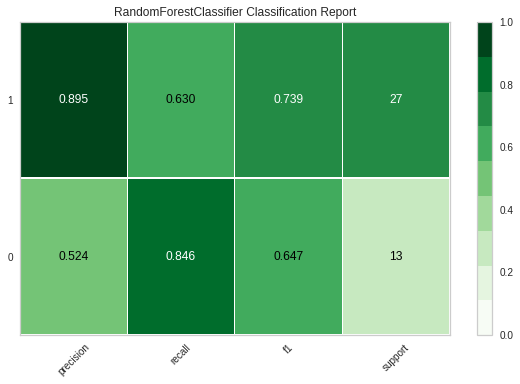

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tunnel_rf, plot='class_report', plot_kwargs={'cmap':'Greens'}, use_train_data=False)

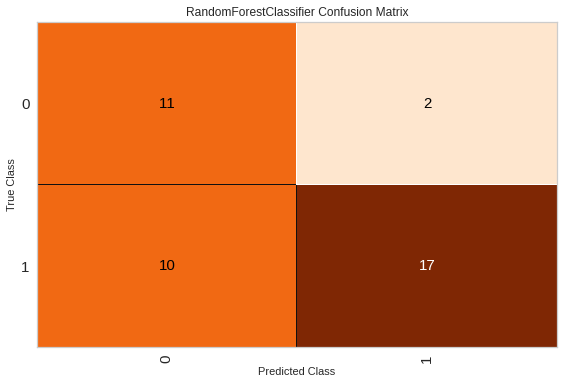

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tunnel_rf, plot='confusion_matrix', plot_kwargs={'cmap':'Oranges'})

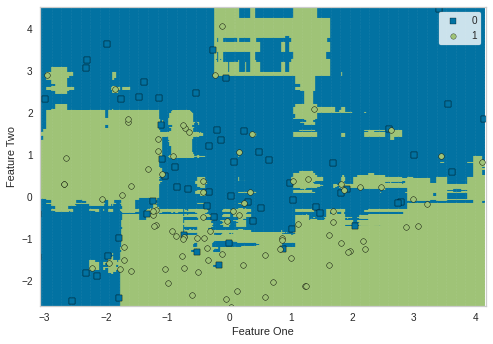

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tunnel_rf, plot='boundary', use_train_data=True)

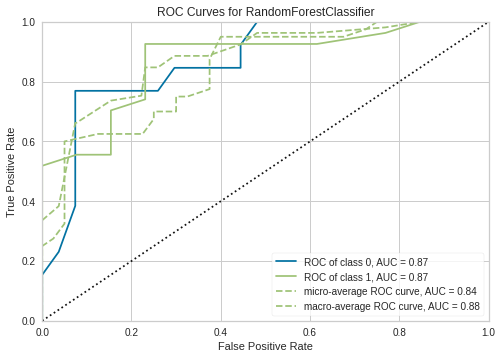

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tunnel_rf, plot='auc')

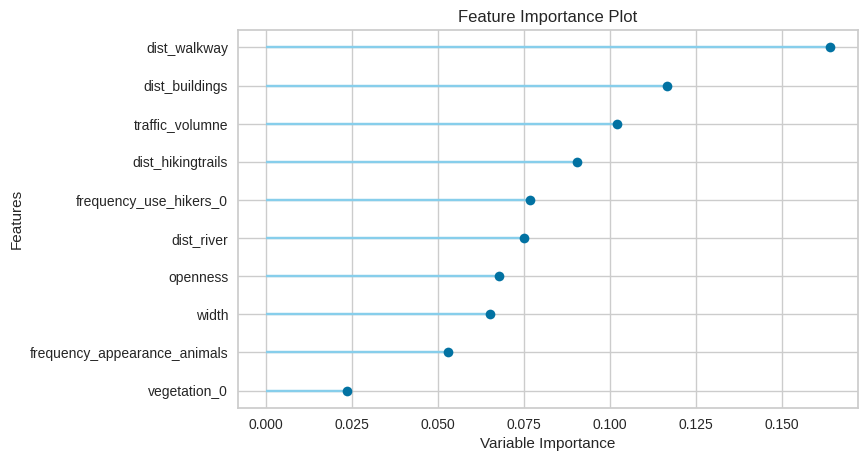

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tunnel_rf, plot='feature')

In [ ]:
fi_df = pd.DataFrame({'Feature': get_config('X_train').columns, 
                      'Value' : tunnel_rf.feature_importances_}).sort_values(by='Value', ascending=False)
             #       'Value' : tunnel_rf.coef_[0, :]}).sort_values(by='Value', ascending=False)
feature_top10 = fi_df['Feature'][:10].to_list()
feature_top10

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned as      frequency_use_hikers_2  dist_river  environmental_score_2  \
61                      0.0    0.638637                    0.0   
127                     0.0   -0.655468                    0.0   
44                      0.0    0.688412                    0.0   
19                      0.0   -1.010767                    0.0   
65                      0.0   -0.173075                    0.0   
..                      ...         ...                    ...   
63                      1.0   -0.731344                    1.0   
187                     0.0    1.808831                    0.0   
185                     0.0    0.717947                    0.0   
66                      0.0    0.404905                    0.0   
4                       0.0   -0.723245                    0.0   

     frequency_use_hikers_5  traffic_volumne  soilslope_5  \
61                      

['dist_walkway',
 'dist_buildings',
 'traffic_volumne',
 'dist_hikingtrails',
 'frequency_use_hikers_0',
 'dist_river',
 'openness',
 'width',
 'frequency_appearance_animals',
 'vegetation_0']

In [ ]:
# model save
save_model(tunnel_rf, '/content/drive/MyDrive/Colab Notebooks/dao_model/tunnel_rf_final_tune')

## Inference

In [ ]:
inference_data_set = data_set[data_set['efficiency']==0]
inference_data_set['efficiency'] = 1

predictModel(tunnel_rf, inference_data_set, 'efficiency')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0263


In [ ]:
for i,idx in enumerate(feature_top10) :
  mono = data_set[data_set['efficiency']==0]
  mono['efficiency'] = 1
  
  try : 
    amount = data_set.groupby('efficiency')[idx].mean()
  except :
    idx = '_'.join(idx.split('_')[:-1])
    #feature_top10[i] = idx
    amount = data_set.groupby('efficiency')[idx].mean()
  diff= amount[0]-amount[1]
  mono[idx] = mono[idx] - diff

  inference_data_set[idx] = inference_data_set[idx] - diff

  print('********* {} ********* '.format(idx))
  predictModel(tunnel_rf, mono, 'efficiency')


print('**********Change All********')
predictModel(tunnel_rf, inference_data_set, 'efficiency')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


********* dist_walkway ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0658
********* dist_buildings ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0395
********* traffic_volumne ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0395
********* dist_hikingtrails ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0263
********* frequency_use_hikers ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0132
********* dist_river ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0263
********* openness ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0263
********* width ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0263
********* frequency_appearance_animals ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0263
********* vegetation ********* 


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0263
**********Change All********
개선율: 0.4868


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=337, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


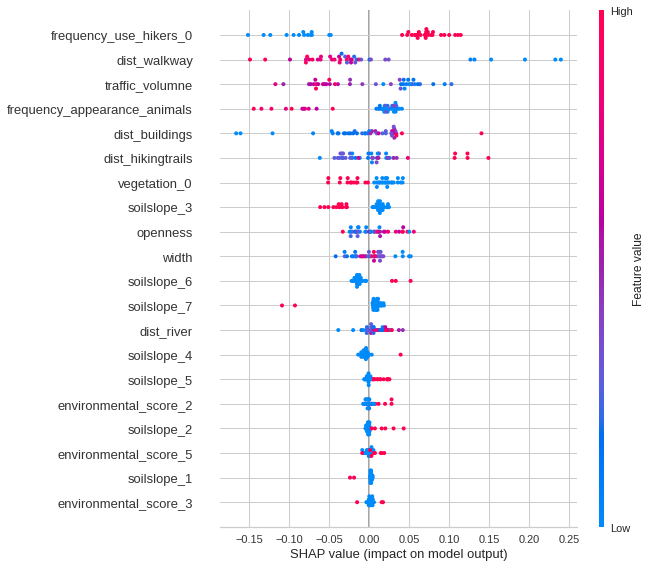

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tunnel_rf)

In [ ]:
tunnel_insight = df_tunnel.groupby('efficiency')[feature_top10].mean().to_numpy()
tunnel_insight = tunnel_insight.T
tunnel_insight = pd.DataFrame(tunnel_insight, columns=['효율성 낮음 평균', '효율성 높음 평균'])
tunnel_insight['feature_importances values'] = fi_df['Value'][:10].to_list()
tunnel_insight.index = feature_top10
tunnel_insight.index.name='Feature Name'
tunnel_insight = tunnel_insight[['feature_importances values','효율성 낮음 평균', '효율성 높음 평균']]
tunnel_insight

feature_importances values     효율성 낮음 평균  \
Feature Name                                                             
dist_walkway                                    0.163838    185.567236   
dist_buildings                                  0.116536      0.188434   
traffic_volumne                                 0.101996  13242.209666   
dist_hikingtrails                               0.090241      1.483618   
frequency_use_hikers_0                          0.076848      0.421053   
dist_river                                      0.074862   1068.666786   
openness                                        0.067569     15.519430   
width                                           0.064997      3.889035   
frequency_appearance_animals                    0.052837      4.789474   
vegetation_0                                    0.023612      0.473684   

                                효율성 높음 평균  
Feature Name                               
dist_walkway                   126.322000  
dist_buildings                   0.265423  
traffic_volumne               9683.667648  
dist_hikingtrails                2.079296  
frequency_use_hikers_0           0.710744  
dist_river                    1162.099967  
openness                        18.535846  
width                            3.798898  
frequency_appearance_animals     3.239669  
vegetation_0                     0.380165

변수 중요도로 뽑힌 변수들의 값을 개선했을 때 53% 이상의 생태통로가 개선될 것으로 예측된다.

tune rf : 0.09 -> 0.534